 # Exploratory Data Analysis

Here’s a cheat sheet for the Best EDA (Exploratory Data Analysis) techniques in Python, especially using Pandas, Matplotlib, Seaborn, and Plotly:

# Basic Data Overview
data.shape               # Rows & columns
data.info()              # Data types & non-null counts
data.describe()          # Stats for numerical columns
data.columns             # Column names
data.dtypes              # Data types
data.nunique()           # Unique values per column

# Missing Value Analysis
data.isnull().sum()                      # Count missing values
data.isnull().mean() * 100               # Percentage of missing
sns.heatmap(data.isnull(), cbar=False)   # Visualize missing data

#  Duplicates & Data Cleaning

data.duplicated().sum()     # Check duplicates
data.drop_duplicates()      # Remove duplicates
data['col'].value_counts()  # Frequency of categories

# Univariate Analysis

##Numerical
data['col'].hist()
sns.histplot(data['col'], kde=True)
sns.boxplot(x=data['col'])
##Categorical 
data['cat_col'].value_counts().plot(kind='bar')
sns.countplot(x='cat_col', data=data)

# . Bivariate Analysis

##Numerical vs Numerical
sns.scatterplot(x='col1', y='col2', data=data)
data[['col1', 'col2']].corr()
sns.heatmap(data.corr(), annot=True)

##Categorical vs Numerical
sns.boxplot(x='cat_col', y='num_col', data=data)
sns.violinplot(x='cat_col', y='num_col', data=data)

##Categorical vs Categorical
pd.crosstab(data['col1'], data['col2'])
sns.heatmap(pd.crosstab(data['col1'], data['col2']), annot=True)

# Target Variable Analysis (Supervised)
sns.histplot(data['target'])
sns.countplot(x='target')
data.groupby('target')['feature'].mean()

#  Outlier Detection

sns.boxplot(data['col'])
## OR using IQR
Q1 = data['col'].quantile(0.25)
Q3 = data['col'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['col'] < Q1 - 1.5*IQR) | (data['col'] > Q3 + 1.5*IQR)]

#  Distribution Plots
sns.histplot(data['col'], kde=True)
sns.kdeplot(data['col'])
sns.pairplot(data)  # For all numeric columns

#  Interactive EDA (Plotly)
import plotly.express as px
px.histogram(data, x='col')
px.box(data, x='cat_col', y='num_col')

#  Feature Correlation and Importance

sns.heatmap(data.corr(), cmap='coolwarm', annot=True)












In [ ]:
import seaborn as sns

In [2]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# check missing value
df.isnull()
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
# delete the null value row
df.shape

(891, 15)

In [5]:
df.dropna().shape

(182, 15)

In [6]:
#column wise deletion 
df.dropna(axis=1)



,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [7]:
df.shape

(891, 15)

# imputation missing value

<Axes: xlabel='age', ylabel='Count'>

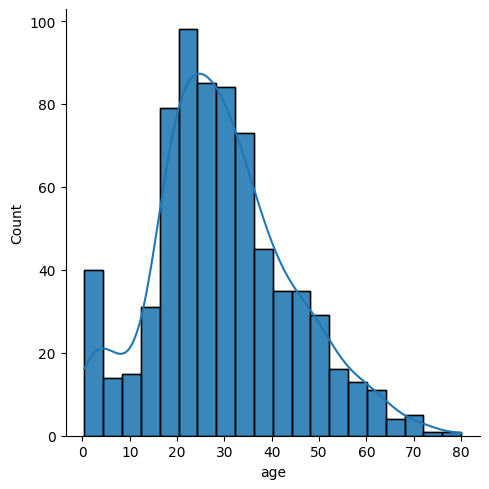

In [8]:
##imputation missing value
data=sns.load_dataset("titanic")
sns.displot(data['age'])
sns.histplot(data['age'],kde=True)

# mean imputation work well normally distri butation

In [9]:
data['age_mean']=data['age'].fillna(data['age'].mean())

data[['age_mean','age']]

# mean imputation work well normally distri butation

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


# median value imputation if we have outliers in dataset

In [10]:
data['age_median']=data['age'].fillna(data['age'].median())
data[['age_median','age_mean','age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


# mode imputation -- for categorical data


In [11]:
data[data['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [12]:
data[data['embarked'].notnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0


In [13]:
mode_value=data[data['embarked'].notnull()]['embarked'].mode()[0]

In [14]:
data['embarked_mode']=data['embarked'].fillna(mode_value)

data[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [15]:
data['embarked_mode'].isnull().sum()

np.int64(0)

### handel the imbalenced data set

In [16]:
# up sampling

import numpy as np
import pandas as pd
# set the random seed for reproducibility
np.random.seed(123)
# create a dataframe with class
n_sample=1000
class_0_ratio=0.9
n_class_0=int(n_sample*class_0_ratio)
n_class_1=n_sample-n_class_0

In [19]:
n_class_0,n_class_1

!pip install imblearn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------ --------------------------------- 1/6 [joblib]
   ------------- -------------------------- 2/6 [scikit-learn]
   ------------- --------------------

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Simulate imbalanced data
X, y = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

print(f"Before SMOTE: {y_train.sum()} positive samples")
print(f"After SMOTE: {y_resampled.sum()} positive samples")


Before SMOTE: 77 positive samples
After SMOTE: 673 positive samples
